In [4]:
import numpy as np
import pandas as pd
import os
from scipy.integrate import odeint


import matplotlib.pyplot as plt
import seaborn as sns

In [5]:

def barplot_MAE_over_rounds(mae_list, save_path, plot_name):

    mae_df = pd.DataFrame({"Round #": range(0,len(mae_list),1), "Average Mean Squared Error": mae_list})

    print(mae_df)

    fig = plt.figure(figsize=(10,5))

    ax = sns.barplot(x="Round #", y="Average Mean Squared Error", data=mae_df)


    #ax.set_ylim(0,300)

    fig.suptitle("Average MAE over rounds")
    fig.tight_layout()


In [48]:
def stripplot_over_rounds(df_path, save_path, plot_name):

    Current_Total_Ground_Truth_Df = pd.read_csv(df_path)
    
    fontsize =20


    fig = plt.figure(figsize=(16,5))

    ax = sns.boxplot(x="Round #", y="Modelled Final Protein", data=Current_Total_Ground_Truth_Df, whis=np.inf, width=0.3)
    ax = sns.stripplot(x="Round #", y="Modelled Final Protein", data=Current_Total_Ground_Truth_Df, color=".3")

    ax.set_xticks(ticks= [0, 4, 9], labels= [1,5, 10], fontsize = fontsize )
    ax.set_yticks(ticks= [0, 250, 500], labels= [0, 250, 500], fontsize = fontsize )
    
    ax.set_xlabel("AL Round #", fontsize = fontsize)
    ax.set_ylabel("Modelled Final Protein", fontsize = fontsize)

    
    
    
    
    
    fig.suptitle("Modelled Protein Yield from MLP-Proposed Compositions", fontsize = fontsize)
    fig.tight_layout()


    ##### Save fig

    # make directory for sticking the output in
    if os.path.isdir(save_path) == False:
        os.mkdir(save_path, mode=0o777)

    #navigate to tidy_data_files
    os.chdir(save_path)

    plt.savefig(plot_name)
    
    plt.show()

['.git', '.gitignore', '.ipynb_checkpoints', 'datasets', 'Dockerfile', 'models', 'plotting.ipynb', 'README.md', 'requirements.txt', 'run_multiple.py', 'scripts', 'test_nb_for_validation.ipynb']


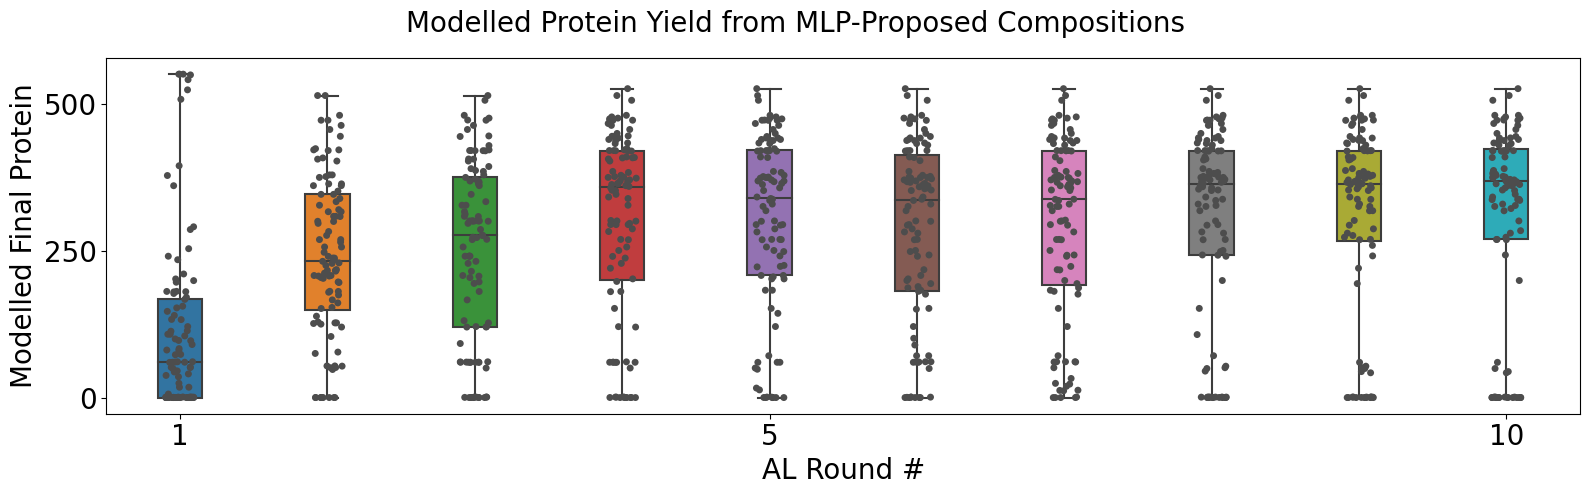

In [49]:
os.chdir("/app")
print(os.listdir())

stripplot_over_rounds("./datasets/grids/Ground_Truths/MasterGroundTruth.csv", "/app/datasets/plots/", "experiment_rounds_box_plots_pub.png")
